# 6.6 Sourcing & Analyzing Time-Series Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'tWrxQJzFyd8p-sB9BWSy'

In [3]:
# Importing theInflation Rate "Comsumer Price Index in Germany" variable.

data = quandl.get('RATEINF/CPI_DEU')

In [4]:
# To print the first 5 rows
data.head(5)

,Value
Date,
1991-01-31,64.0
1991-02-28,64.3
1991-03-31,64.3
1991-04-30,64.5
1991-05-31,64.7


In [5]:
# To print the number of rows and columns of data
data.shape

(390, 1)

In [6]:
# To print the properties of the variable been examined
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

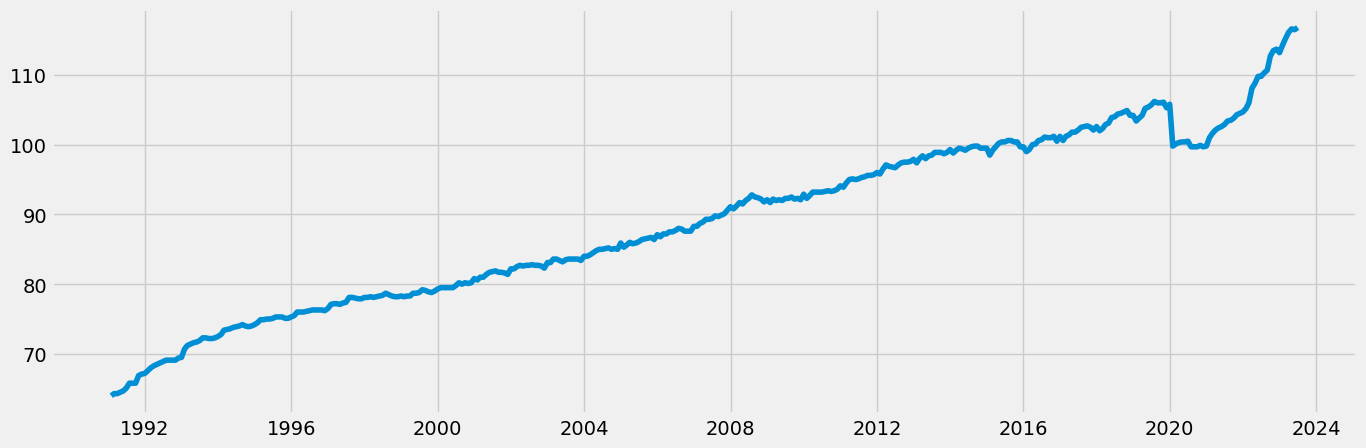

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

#### This plot represents the Inflation rate by consumer price index in Germany. It includes observations from 1991 till date as well as forecast until 2024. The trend appear to be increasing since 1992 and projected to increase more inm the future

### 2. Subsetting, wrangling, and cleaning time-series data

In [9]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [10]:
data_2.head()

,Date,Value
0,1991-01-31,64.0
1,1991-02-28,64.3
2,1991-03-31,64.3
3,1991-04-30,64.5
4,1991-05-31,64.7


In [44]:
data_sub = data_2.loc[(data_2['Date'] >= '2000-01-01') & (data_2['Date'] < '2023-12-31')]

In [45]:
data_sub.shape

(282, 2)

In [46]:
data_sub.head()

,Date,Value
108,2000-01-31,79.5
109,2000-02-29,79.5
110,2000-03-31,79.5
111,2000-04-30,79.5
112,2000-05-31,79.5


In [47]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2000-01-31,79.5
2000-02-29,79.5
2000-03-31,79.5
2000-04-30,79.5
2000-05-31,79.5


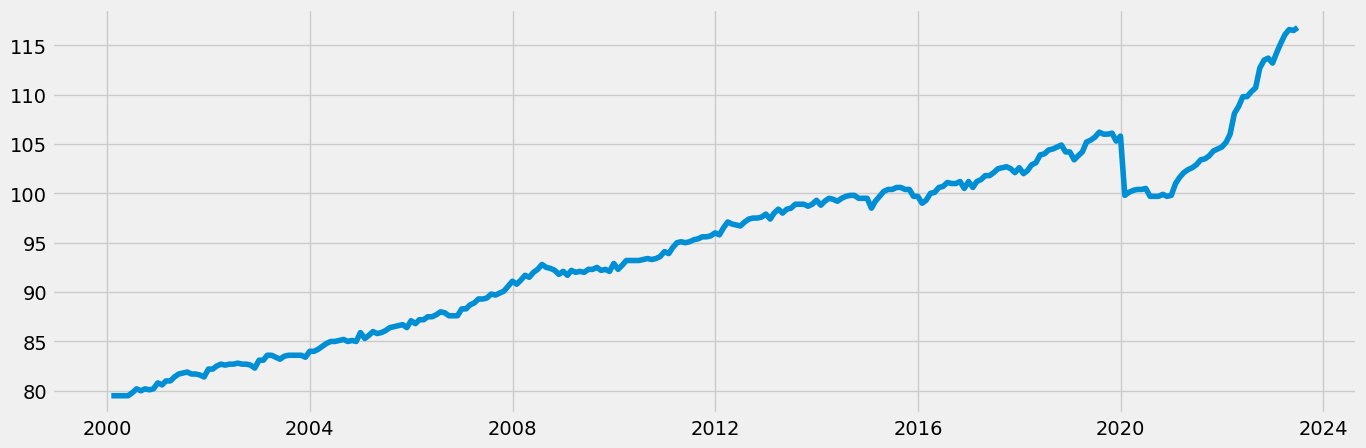

In [48]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

#### Filtered dates from 2000 to 2023 because of the fact that economic conditions in the present are different than in the 90s, so I wouldn’t want that data incorrectly influencing the calculations. The results appear similar to the trend before subsetting

In [49]:
# Check for missing values

data_sub.isnull().sum() 

# No missing value

Value    0
dtype: int64

In [50]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# 113 duplicates found

113

In [51]:
# To drop duplicates
data_sub_no_dup = data_sub.drop_duplicates()

In [52]:
# Another Check for duplicates

dups = data_sub_no_dup.duplicated()
dups.sum()

0

In [53]:
data_sub_no_dup.shape

(169, 1)

In [55]:
data_sub_no_dup.head()

,Value
datetime,
2000-01-31,79.5
2000-06-30,79.8
2000-07-31,80.2
2000-08-31,80.0
2000-10-31,80.1


### 3. Time-series analysis: decomposition

In [58]:
# new subset requires reset of index, subset and then to reset Date as index in the dataframeb
data_3 = data_sub_no_dup.reset_index()

In [59]:
data_3.head()

,datetime,Value
0,2000-01-31,79.5
1,2000-06-30,79.8
2,2000-07-31,80.2
3,2000-08-31,80.0
4,2000-10-31,80.1


In [62]:
data_sub_2 = data_3.loc[(data_3['datetime'] >= '2000-01-01') & (data_3['datetime'] < '2023-12-31')]

In [63]:
data_sub_2.shape

(169, 2)

In [64]:
data_sub_2.head()

,datetime,Value
0,2000-01-31,79.5
1,2000-06-30,79.8
2,2000-07-31,80.2
3,2000-08-31,80.0
4,2000-10-31,80.1


In [70]:
data_sub_2 = data_sub_2.set_index('datetime') # Set the datetime as the index of the dataframe.

In [71]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub_2, model = 'additive', period=12)

In [72]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

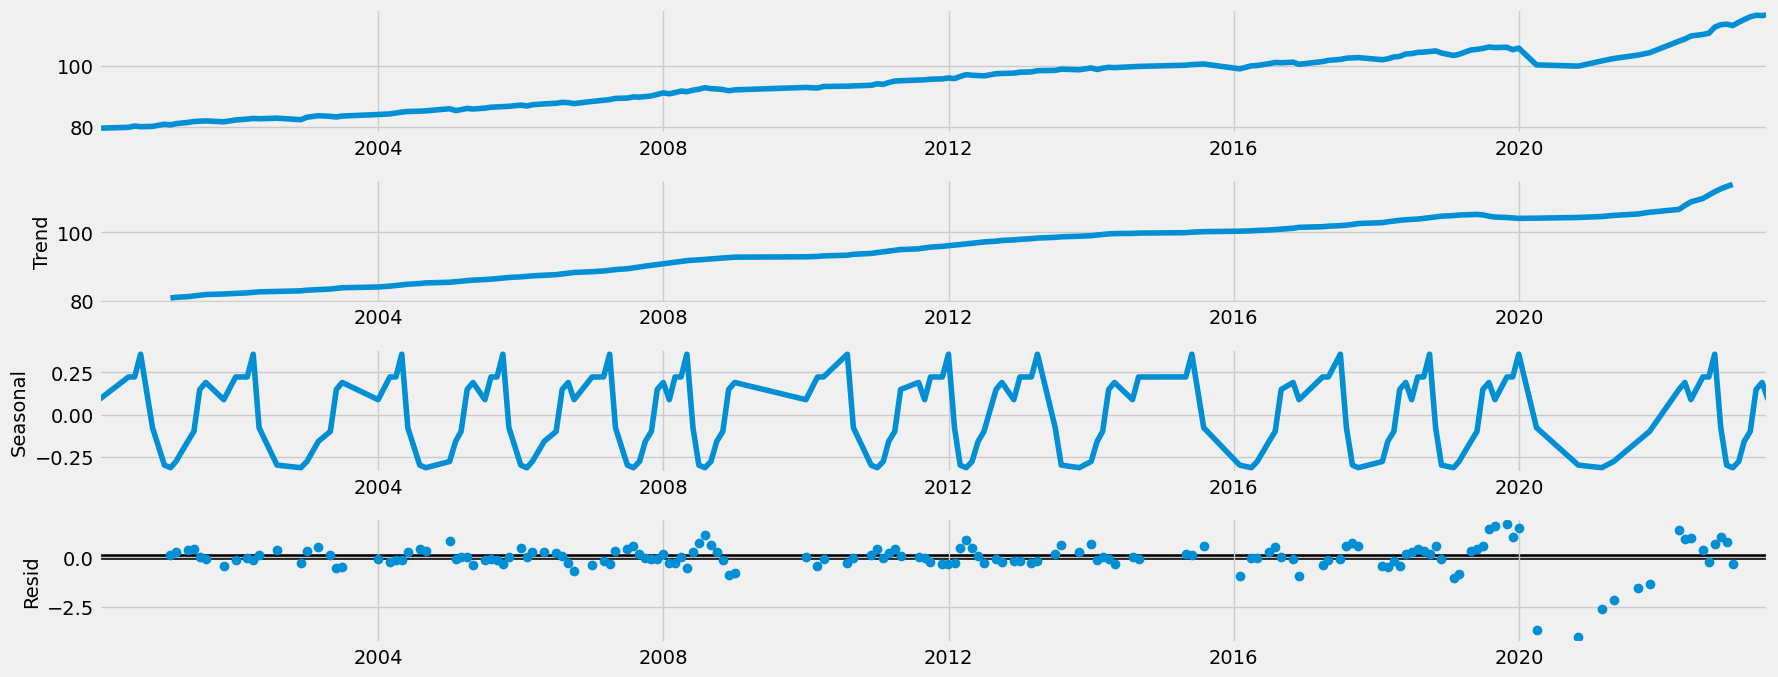

In [73]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Overall the data indicates there's an increasing trend of inflation rate in Germany since 1999 until the present year and into the future. The seasonality curve indicates fluctuation in seasons of the year that changes at regular interval. There is relatively some level of noise to the data and this will not be addressed for this analysis i.e there will be no need to smooth out the noise

### 4. Testing for stationarity

In [ ]:
# To conduct Dickey-Fuller test by defining null and alternative hypothesis
# Null hypothesis: There is a unit root in the data
# Disprove the null = no unit root = stationary data = can proceed with forecast

In [75]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   1.242062
p-value                          0.996264
Number of Lags Used              8.000000
Number of Observations Used    160.000000
Critical Value (1%)             -3.471896
Critical Value (5%)             -2.879780
Critical Value (10%)            -2.576495
dtype: float64


#### Null hypothesis can't be rejected. There is a unit root in your data, and your data is non-stationary because the confidence interval of 5% being considered here(-2.879) is smaller than the test statistics(1.24). The test result is not significant because the p-value is not less than 0.05

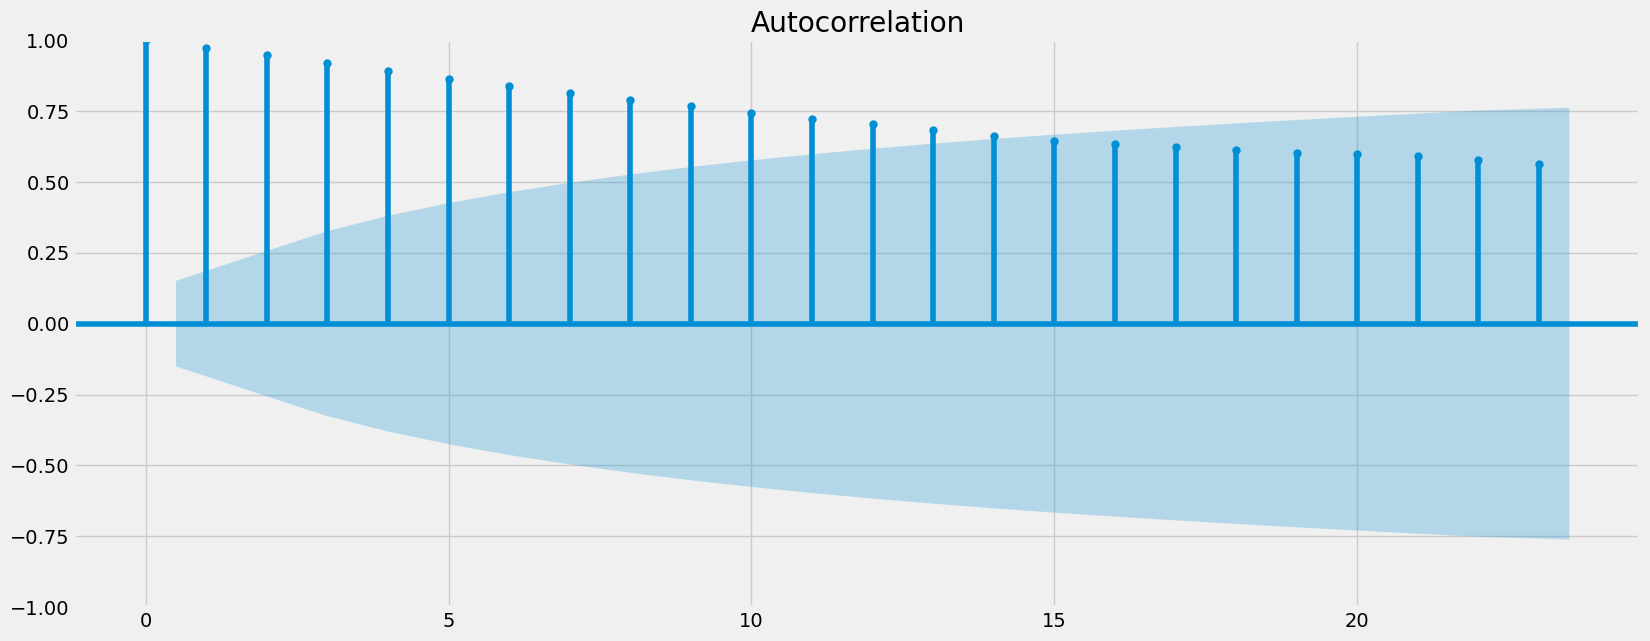

In [76]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub_2)
plt.show()

#### All the data are correlated with each other. All the lines go above the blue edge of the confidence interval

### 5. Stationarizing the Federal Reserve Economic Data

In [77]:
data_diff = data_sub_2 - data_sub_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [78]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [79]:
data_diff.head()

,Value
datetime,
2000-06-30,0.3
2000-07-31,0.4
2000-08-31,-0.2
2000-10-31,0.1
2000-12-31,0.7


In [80]:
data_diff.columns

Index(['Value'], dtype='object')

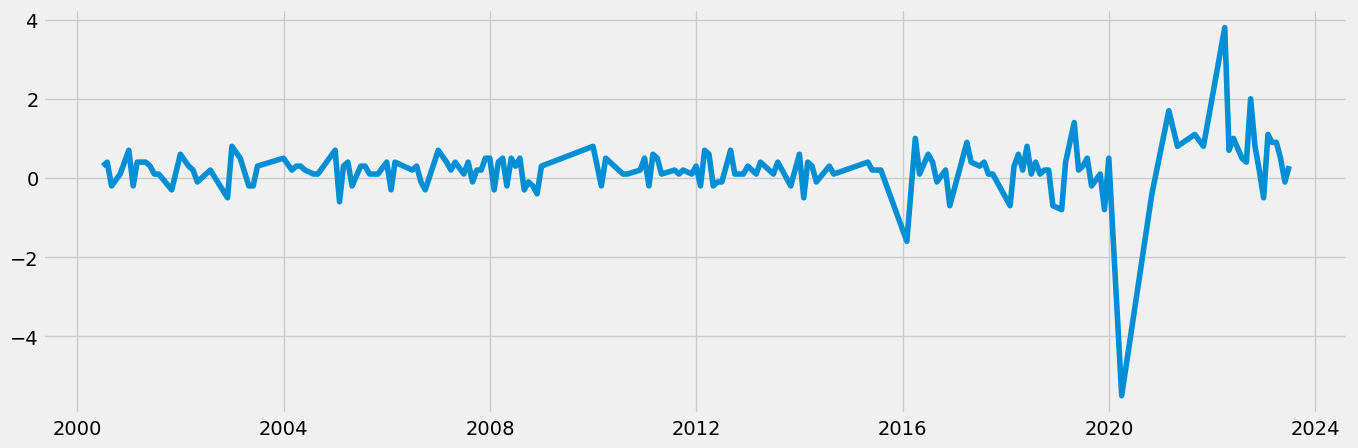

In [81]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [82]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.715681
p-value                          0.003898
Number of Lags Used              9.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


#### differencing made the Test Statistic(-3.715) smaller than the Critical Value(-2.88) at all levels with a satisfactory p-value much less than 0.05. This means we can reject the null hypothesis and consider the time series stationary

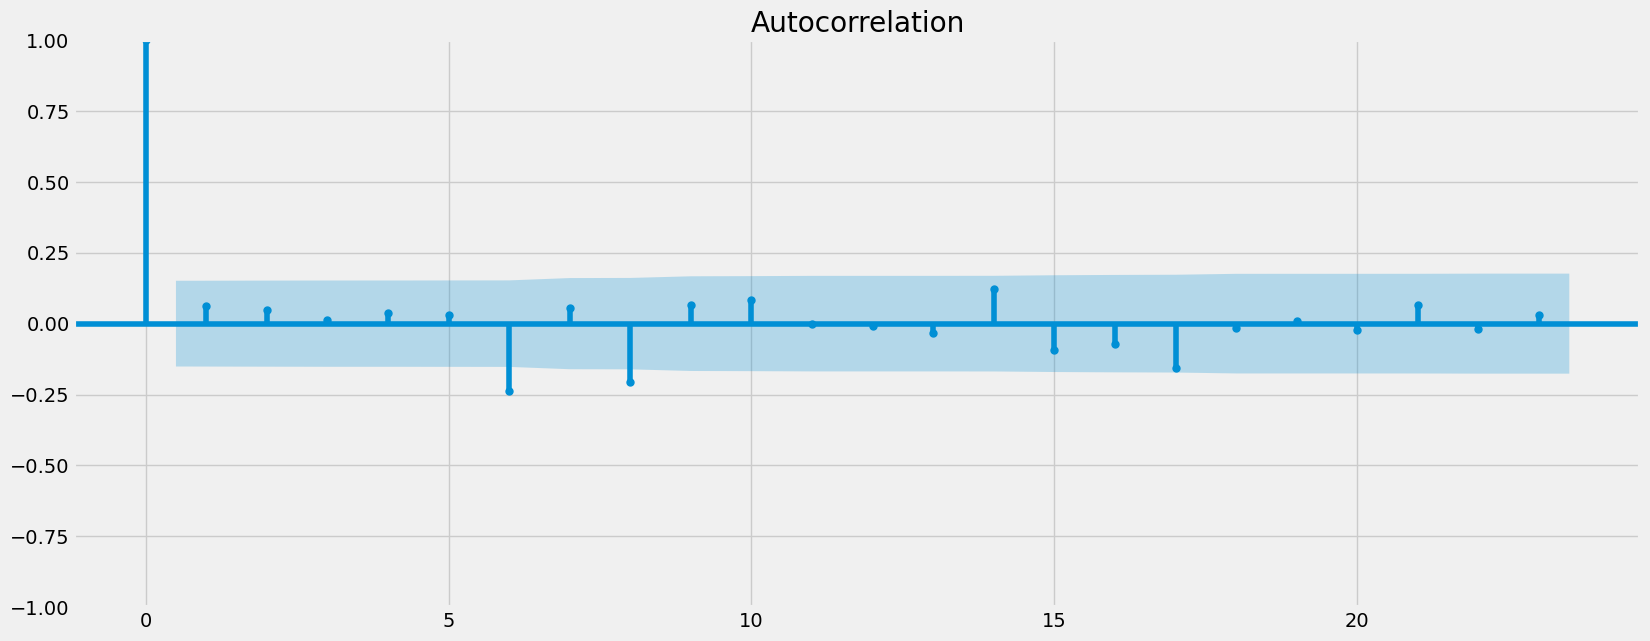

In [83]:
# To check for autocorrelations
plot_acf(data_diff)
plt.show()